<a href="https://colab.research.google.com/github/AlexErmakov77/ML-Python/blob/main/4_1_Pandas_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 
*   [Полный User Guide по библиотеке pandas](https://pandas.pydata.org/docs/user_guide/index.html)
*   [Куча полезных рецептов и хороших практик](https://pandas.pydata.org/docs/user_guide/cookbook.html)

Данные iris.csv можно скачать отсюда https://drive.google.com/file/d/1fjyopp9FZ-g6KIsIE8vPX2r62A43h2XI/view?usp=sharing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [ ]:
import pandas as pd
import numpy as np

## Лямбда-функции

[Хороший материал про лямбда-функции](https://pythonru.com/osnovy/vse-chto-nuzhno-znat-o-lambda-funkcijah-v-python)

In [ ]:
def f(x):
  return x ** 2

In [ ]:
f(-6), f(2), f(0)

(36, 4, 0)

In [ ]:
f = lambda x: 0 if x < 0 else x ** 2

In [ ]:
f(-6), f(2), f(0)

(0, 4, 0)

In [ ]:
L = [1, 2, 2, 3, 4]

list(map(lambda x: x**2, L))

[1, 4, 4, 9, 16]

In [ ]:
set(map(lambda x: x**2, L))

{1, 4, 9, 16}

In [ ]:
L = [[1, 2, 3], [4, 5, 6], [-1, 4, 5]]

In [ ]:
list(map(lambda l: list(map(lambda x: x**2, l)), L))

[[1, 4, 9], [16, 25, 36], [1, 16, 25]]

## Pandas
В pandas существует два основных объекта: pandas Series и pandas DataFrame. Первая это по сути асбтракция над одномерным массивом данных с дополнительными метаданными, а вторая абстракция это по сути "таблица", состоящая из наборов pandas Series.

### Создание объекта
Начнем с pd.Series. Также, как и для numpy массива мы можем задать тип данных. Доступны все те же типы данных, что и в numpy + есть возможность конвертировать одни типы данных в другие с помощью astype + можно указывать [свои функции](https://pbpython.com/pandas_dtypes.html) для преобразования.

In [ ]:
s = pd.Series([1,2,3], dtype=np.int32, name='numbers') # pd.Series
s

0    1
1    2
2    3
Name: numbers, dtype: int32

Обратите внимание на колонку слева, это индекс, и если не указано обратное, он создается автоматически. Индексы мы будем встречать как для pd.Series, так и для pd.DataFrame. Что же он дает? Аналогия здесь такая же, что с телефонным справочником. Индексы позволяют более логично категоризовать информацию, а также более оптимально делать некоторые операции над сериями (pd.Series) и датафреймами (pd.DataFrame). Вкратце, можно отметить, что индексы
1. Идентифицируют данные (т.е. предоставляют метаданные) с помощью известных индикаторов, важных для анализа, визуализации и отображения в интерактивной консоли
2. Включают автоматическое и явное выравнивание данных.
3. Позволяют интуитивно получать и настраивать подмножества набора данных.

Помимо этого обратите внимание, что у серии также есть имя. Это полезно, когда нам нужно вставить новую колонку в DataFrame без явного указания имени.

Следующим образом мы можем задать произвольный индекс, теперь наши записи идентифицируют буквы a b c

In [ ]:
s = pd.Series([1,2,3], dtype=np.int32, name='numbers', index=['a', 'b', 'c'])
s

a    1
b    2
c    3
Name: numbers, dtype: int32

Помимо индекса (свойства s.index) также сохраняется сквозняется целочисленная индексация.

Ниже выборка просто по целочисленному индексу (сквозному), как будто мы работаем с обычным списком

In [ ]:
s['b']

2

In [ ]:
s[2]

3

Метод доступа .loc позволяет делать выборку именно по индексу.
Обратите внимание, что здесь используются именно квадратные скобки. Скорее всего так сделано, чтобы такая выборка была похоже на выборку из обычного списка.

In [ ]:
s.loc['b']

2

Посмотреть отдельно на индекс можно с помощью свойства .index

In [ ]:
s

a    1
b    2
c    3
Name: numbers, dtype: int32

In [ ]:
s.index

Index(['a', 'b', 'c'], dtype='object')

Создадим pandas DataFrame из случайной numpy матрицы

In [ ]:
m

array([[0.64738307, 0.04870257, 0.5446089 ],
       [0.77353866, 0.01450875, 0.44887038],
       [0.99852851, 0.89911423, 0.75783526],
       [0.03496281, 0.16562396, 0.77969052],
       [0.29084283, 0.62002678, 0.39086647],
       [0.61785811, 0.43415485, 0.63165657],
       [0.43913597, 0.17389062, 0.44632033],
       [0.53779321, 0.37984544, 0.20032831],
       [0.53272615, 0.93793332, 0.9258747 ],
       [0.62682627, 0.94397624, 0.16470359]])

In [ ]:
m = np.random.rand(10,3)
df = pd.DataFrame(m)
df

,0,1,2
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
5,0.617858,0.434155,0.631657
6,0.439136,0.173891,0.446320
7,0.537793,0.379845,0.200328
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


Мы видим строковый индекс, который был создан автоматически, а также колоночный (или просто колонки), которые также были заданы автоматически. У нас получился не совсем привычный вид таблицы, давайте зададим колонкам более понятные имена.

In [ ]:
df = pd.DataFrame(data=m, columns=['first', 'second', 'third'],)
df

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
5,0.617858,0.434155,0.631657
6,0.439136,0.173891,0.446320
7,0.537793,0.379845,0.200328
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


В pandas DataFrame выборка квадратными скобками происходит по колонкам

In [ ]:
df['first']

0    0.647383
1    0.773539
2    0.998529
3    0.034963
4    0.290843
5    0.617858
6    0.439136
7    0.537793
8    0.532726
9    0.626826
Name: first, dtype: float64

In [ ]:
type(df['first'])

pandas.core.series.Series

In [ ]:
df[0] # такой колонки нет, будет ошибка

KeyError: ignored

Но ВНЕЗАПНО, если мы попробуем применить слайсинг как в обычных массивах numpy или списках, выборка будет происходить по строкам. Эта та особенность, которую мы вынуждены просто запомнить. Выборка при этом происходит по целочисленной сквозной индексации (0,1,2,3,4,...).

In [ ]:
df['first'][:3]

0    0.647383
1    0.773539
2    0.998529
Name: first, dtype: float64

In [ ]:
df[:2]

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870


In [ ]:
df.head()

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   10 non-null     float64
 1   second  10 non-null     float64
 2   third   10 non-null     float64
dtypes: float64(3)
memory usage: 368.0 bytes


Есть удобный способ инициализировать новый DataFrame с помощью словаря. Ключи станут названиями колонок, а значения по ключам столбцами.

In [ ]:
# pd.DataFrame через словарь
d = {
    'Name': ['Eugene', 'Alexey', 'Vladimir', 'Elena'],
    'Age': [24, 25, 30, 40]
}
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,Name,Age
a,Eugene,24
b,Alexey,25
c,Vladimir,30
d,Elena,40


### Просмотр 

По умолчанию colab notebook (или jupyter notebook) будет "обрезать" отображение табличек, так как если там много строк, они могут занимать много места, и привести ваш браузер в замешательство, а компьютер в полный аут.

[Материал по визуализации табличек](https://habr.com/ru/post/521894/)

In [ ]:
df

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
5,0.617858,0.434155,0.631657
6,0.439136,0.173891,0.446320
7,0.537793,0.379845,0.200328
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


In [ ]:
pd.DataFrame(np.random.rand(100,2)) # так будет пропущено несколько строчек в целях экономии места

,0,1
0,0.576624,0.027091
1,0.792765,0.797403
2,0.131067,0.630055
3,0.634371,0.485238
4,0.038433,0.759506
...,...,...
95,0.611967,0.800765
96,0.686712,0.221825
97,0.141030,0.406531
98,0.787887,0.970593


In [ ]:
print(pd.DataFrame(np.random.rand(100,2)))

           0         1
0   0.553361  0.467172
1   0.276617  0.429596
2   0.729492  0.095592
3   0.388538  0.010952
4   0.660398  0.143789
..       ...       ...
95  0.475384  0.678457
96  0.181185  0.544672
97  0.193821  0.253791
98  0.380562  0.114104
99  0.921607  0.136160

[100 rows x 2 columns]


Впрочем, вряд ли вам понадобится отсматривать, скажем, 100000 строк какой-нибудь таблицы вручную. Как правило, нам достаточно посмотреть первые несколько строк таблицы, чтобы понять что там находится, и правильно ли мы прочитали нашу таблицу из файла.

In [ ]:
df.head(2) # покажем первые две строки датафрейма

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870


In [ ]:
df.tail(2) # последние две строчки с конца

,first,second,third
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


Мы можем отдельно посмотреть строковый индекс и колонки с помощью соответствующих свойств объекта

In [ ]:
df = pd.DataFrame(data=m)
df

,0,1,2
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
5,0.617858,0.434155,0.631657
6,0.439136,0.173891,0.446320
7,0.537793,0.379845,0.200328
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


In [ ]:
df.columns = ['first', 'second', 'third']

In [ ]:
df

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
5,0.617858,0.434155,0.631657
6,0.439136,0.173891,0.446320
7,0.537793,0.379845,0.200328
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


In [ ]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [ ]:
df.columns

Index(['first', 'second', 'third'], dtype='object')

In [ ]:
df.columns[1]

'second'

Узнать форму нашей таблицы

In [ ]:
df.shape

(10, 3)

In [ ]:
df.shape[0]

10

In [ ]:
df.shape[1]

3

Посмотреть типы данных

In [ ]:
df.dtypes

first     float64
second    float64
third     float64
dtype: object

И менять их с помощью метода astype. Обратите внимание, что мы можем передать целый словарь в котором ключи это названия колонок, а значения по ключу это тип данных к которому мы хотим преобразовать соответствующую колонку.

In [ ]:
df.astype({'first': np.float32}).dtypes

first     float32
second    float64
third     float64
dtype: object

Мы можем отказаться от всех метаданных и перейти к numpy матрице, чтобы работать с ней с помощью методов из библиотеки numpy

In [ ]:
df.to_numpy()

array([[0.64738307, 0.04870257, 0.5446089 ],
       [0.77353866, 0.01450875, 0.44887038],
       [0.99852851, 0.89911423, 0.75783526],
       [0.03496281, 0.16562396, 0.77969052],
       [0.29084283, 0.62002678, 0.39086647],
       [0.61785811, 0.43415485, 0.63165657],
       [0.43913597, 0.17389062, 0.44632033],
       [0.53779321, 0.37984544, 0.20032831],
       [0.53272615, 0.93793332, 0.9258747 ],
       [0.62682627, 0.94397624, 0.16470359]])

Крайне полезен метод .describe(), который выводит нам дескриптивную статистику по нашему датафрейму.

In [ ]:
df.describe()

,first,second,third
count,10.000000,10.000000,10.000000
mean,0.549960,0.461778,0.529076
std,0.261683,0.368825,0.248680
min,0.034963,0.014509,0.164704
25%,0.462534,0.167691,0.404730
50%,0.577826,0.407000,0.496740
75%,0.642244,0.829342,0.726291
max,0.998529,0.943976,0.925875


А в методе info мы можем сразу проверить наличие пропусков (графа Non-Null Count), а также посмотреть какой объем памяти занимает наша табличка (чем меньше, тем, конечно, лучше).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   10 non-null     float64
 1   second  10 non-null     float64
 2   third   10 non-null     float64
dtypes: float64(3)
memory usage: 368.0 bytes


In [ ]:
df.astype({'first': np.float32}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   10 non-null     float32
 1   second  10 non-null     float64
 2   third   10 non-null     float64
dtypes: float32(1), float64(2)
memory usage: 328.0 bytes


По большому счету колонки это тот же индекс, только по горизонтальной оси (axis = 1). Строковый и столбцовый индексы могут заменять друг друга, давайте продемонстрируем это с помощью операции транспонирования.

Кстати, ниже напоминание об осях из прошлой лекции.

![axes](https://railsware.com/blog/wp-content/uploads/2018/11/data-frame-axes.png)

![axes](https://i.stack.imgur.com/FzimB.png)

In [ ]:
df = df.head(10)

In [ ]:
df

,first,second,third
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
5,0.617858,0.434155,0.631657
6,0.439136,0.173891,0.446320
7,0.537793,0.379845,0.200328
8,0.532726,0.937933,0.925875
9,0.626826,0.943976,0.164704


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9
first,0.647383,0.773539,0.998529,0.034963,0.290843,0.617858,0.439136,0.537793,0.532726,0.626826
second,0.048703,0.014509,0.899114,0.165624,0.620027,0.434155,0.173891,0.379845,0.937933,0.943976
third,0.544609,0.448870,0.757835,0.779691,0.390866,0.631657,0.446320,0.200328,0.925875,0.164704


Мы можем сортировать строки таблицы по значениям колонок. Обратите внимание, что индекс остался прежним.

In [ ]:
df.sort_values('first', ascending=True) # ascending=False по убыванию

,first,second,third
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
6,0.439136,0.173891,0.446320
8,0.532726,0.937933,0.925875
7,0.537793,0.379845,0.200328
5,0.617858,0.434155,0.631657
9,0.626826,0.943976,0.164704
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835


In [ ]:
df.sort_values(['first', 'second'], ascending=[True, False])

,first,second,third
3,0.034963,0.165624,0.779691
4,0.290843,0.620027,0.390866
6,0.439136,0.173891,0.446320
8,0.532726,0.937933,0.925875
7,0.537793,0.379845,0.200328
5,0.617858,0.434155,0.631657
9,0.626826,0.943976,0.164704
0,0.647383,0.048703,0.544609
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835


А можем сортировать именно индекс.

In [ ]:
df_T = df.T

In [ ]:
df_T

,0,1,2,3,4,5,6,7,8,9
first,0.647383,0.773539,0.998529,0.034963,0.290843,0.617858,0.439136,0.537793,0.532726,0.626826
second,0.048703,0.014509,0.899114,0.165624,0.620027,0.434155,0.173891,0.379845,0.937933,0.943976
third,0.544609,0.448870,0.757835,0.779691,0.390866,0.631657,0.446320,0.200328,0.925875,0.164704


In [ ]:
df_T.sort_index(axis=0)

,0,1,2,3,4,5,6,7,8,9
first,0.647383,0.773539,0.998529,0.034963,0.290843,0.617858,0.439136,0.537793,0.532726,0.626826
second,0.048703,0.014509,0.899114,0.165624,0.620027,0.434155,0.173891,0.379845,0.937933,0.943976
third,0.544609,0.448870,0.757835,0.779691,0.390866,0.631657,0.446320,0.200328,0.925875,0.164704


In [ ]:
df.T.sort_index(axis=1, ascending=False)

,9,8,7,6,5,4,3,2,1,0
first,0.626826,0.532726,0.537793,0.439136,0.617858,0.290843,0.034963,0.998529,0.773539,0.647383
second,0.943976,0.937933,0.379845,0.173891,0.434155,0.620027,0.165624,0.899114,0.014509,0.048703
third,0.164704,0.925875,0.200328,0.446320,0.631657,0.390866,0.779691,0.757835,0.448870,0.544609


In [ ]:
df1 = pd.DataFrame({
    'date' : ['2020-01-01', '2020-02-01', '2020-03-01'],
    'usd' : [1, 2, 3],
    'rur' : [4, 8, 12]
})
df1

,date,usd,rur
0,2020-01-01,1,4
1,2020-02-01,2,8
2,2020-03-01,3,12


In [ ]:
df1 = df1.astype({'date':np.datetime64})

In [ ]:
df1

,date,usd,rur
0,2020-01-01,1,4
1,2020-02-01,2,8
2,2020-03-01,3,12


In [ ]:
df1.dtypes

date    datetime64[ns]
usd              int64
rur              int64
dtype: object

In [ ]:
df1.set_index('date', inplace=True)

In [ ]:
df1

,usd,rur
date,,
2020-01-01,1,4
2020-02-01,2,8
2020-03-01,3,12


In [ ]:
import matplotlib.pyplot as plt

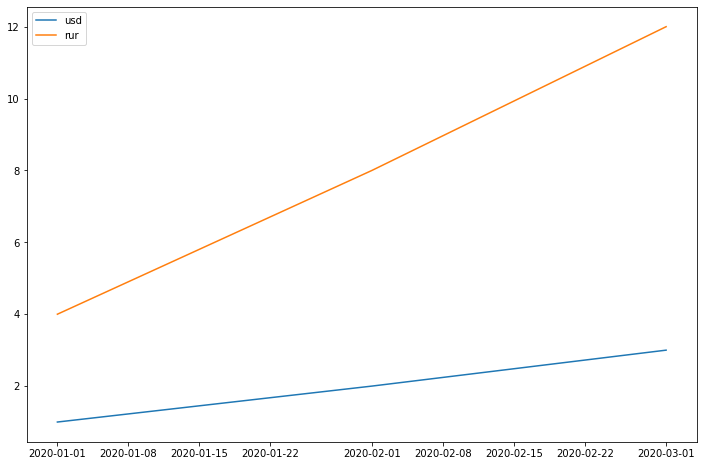

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df1.index, df1['usd'], label='usd')
plt.plot(df1.index, df1['rur'], label='rur')
plt.legend()
plt.show()

In [ ]:
df1.loc['2020-02-01', 'rur']

8

### Выборка
Подробная информация по выборкам данных представлена [тут](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

#### Квадратные скобки
Как уже отмечалось выше, для датафреймов выборка происходит по столбцам.

In [ ]:
df['third']

0    0.544609
1    0.448870
2    0.757835
3    0.779691
4    0.390866
5    0.631657
6    0.446320
7    0.200328
8    0.925875
9    0.164704
Name: third, dtype: float64

In [ ]:
df[['third', 'first']]

,third,first
0,0.544609,0.647383
1,0.448870,0.773539
2,0.757835,0.998529
3,0.779691,0.034963
4,0.390866,0.290843
5,0.631657,0.617858
6,0.446320,0.439136
7,0.200328,0.537793
8,0.925875,0.532726
9,0.164704,0.626826


In [ ]:
df[1:4] # слайсинг по сквозному целочисленному индексу как в массиве

,first,second,third
1,0.773539,0.014509,0.448870
2,0.998529,0.899114,0.757835
3,0.034963,0.165624,0.779691


#### Выборка по метке (лейблу)
Добавим новый столбец в нашу таблицу и сделаем его новым индексом с помощью метода .set_index()

In [ ]:
df = pd.DataFrame(np.random.rand(5, 3))
df

,0,1,2
0,0.375435,0.011910,0.212827
1,0.374484,0.973505,0.936041
2,0.010015,0.086145,0.208148
3,0.018985,0.897052,0.195056
4,0.583250,0.922223,0.175678


In [ ]:
df['new_index'] = pd.Series(['a', 'b', 'e', 'c', 'g'])
df

,0,1,2,new_index
0,0.375435,0.011910,0.212827,a
1,0.374484,0.973505,0.936041,b
2,0.010015,0.086145,0.208148,e
3,0.018985,0.897052,0.195056,c
4,0.583250,0.922223,0.175678,g


In [ ]:
# df['test_col'] = [[round(np.random.rand(), 3) for i in range(3)] for i in range(df.shape[0])]
# df

,0,1,2,new_index,test_col
0,0.117958,0.256426,0.174802,a,"[0.93, 0.829, 0.538]"
1,0.291829,0.026689,0.041560,b,"[0.38, 0.416, 0.27]"
2,0.299317,0.689872,0.813067,e,"[0.417, 0.947, 0.415]"
3,0.801704,0.959947,0.676425,c,"[0.075, 0.587, 0.369]"
4,0.746120,0.994693,0.966337,g,"[0.678, 0.808, 0.212]"


In [ ]:
df = df.set_index('new_index')
df

,0,1,2
new_index,,,
a,0.375435,0.011910,0.212827
b,0.374484,0.973505,0.936041
e,0.010015,0.086145,0.208148
c,0.018985,0.897052,0.195056
g,0.583250,0.922223,0.175678


Теперь с помощью .loc мы можем производить навигацию по этому индексу

In [ ]:
df.loc['b']

0    0.374484
1    0.973505
2    0.936041
Name: b, dtype: float64

И даже использовать диапазоны (слайсы) по индексу

In [ ]:
df.loc['b':'c']

,0,1,2
new_index,,,
b,0.374484,0.973505,0.936041
e,0.010015,0.086145,0.208148
c,0.018985,0.897052,0.195056


Через запятую мы можем указать также и фильтр по столбцам

In [ ]:
df

,0,1,2
new_index,,,
a,0.375435,0.011910,0.212827
b,0.374484,0.973505,0.936041
e,0.010015,0.086145,0.208148
c,0.018985,0.897052,0.195056
g,0.583250,0.922223,0.175678


In [ ]:
df.columns = ['first', 'second', 'third']

In [ ]:
df[['first', 'second']]

,first,second
new_index,,
a,0.375435,0.011910
b,0.374484,0.973505
e,0.010015,0.086145
c,0.018985,0.897052
g,0.583250,0.922223


In [ ]:
df.loc[:'e', ['second', 'third']]

,second,third
new_index,,
a,0.011910,0.212827
b,0.973505,0.936041
e,0.086145,0.208148


#### Выборка по позиции в таблице
Сохраняется сквозная целочисленная индексация, и она доступна с помощью метода .iloc. Скобки также квадратные

In [ ]:
df

,first,second,third
new_index,,,
a,0.375435,0.011910,0.212827
b,0.374484,0.973505,0.936041
e,0.010015,0.086145,0.208148
c,0.018985,0.897052,0.195056
g,0.583250,0.922223,0.175678


In [ ]:
df.loc[1:3]

TypeError: ignored

In [ ]:
df.iloc[1:3]

,first,second,third
new_index,,,
b,0.374484,0.973505,0.936041
e,0.010015,0.086145,0.208148


Происходит выборка именно по **номеру** строки и **номеру** столбца (начиная с нуля)

In [ ]:
df.iloc[1:3, [0, 2]]

,first,third
new_index,,
b,0.374484,0.936041
e,0.010015,0.208148


### Чтение и запись данных

В pandas присутствует огромное кол-во возможностей для чтения записи данных.

Например, в методе pd.read_csv доступны специфичные опции для формата (например, разделитель колонок sep), но и также можно, например, дополнить список значений, которые pandas по умолчанию считает пропусками, задав явно параметр na_values.

Более подробную информацию про чтение запись данных можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [ ]:
iris = pd.read_csv('iris.csv')

In [ ]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
iris = pd.read_csv('iris.csv', header='infer', sep=',')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
pd.read_ # доступно очень большое кол-во форматов для чтения

In [ ]:
# запись to_csv() и другие

In [ ]:
iris.to_csv('iris_test.csv', header=True, index=False) # сохраняем в качестве первой строки список колонок, первой колонкой индекс НЕ пишем

In [ ]:
!ls

'iris (1).csv'	 iris.csv   iris_test.csv   sample_data


In [ ]:
iris.to_excel('iris_test.xlsx', header=True, index=False) # сохраняем в качестве первой строки список колонок, первой колонкой индекс НЕ пишем

In [ ]:
!ls

'iris (1).csv'	 iris.csv   iris_test.csv   iris_test.xlsx   sample_data


Загрузим набор данных iris.csv, и потренируемся делать выборки на нем.

In [ ]:
import numpy as np
import pandas as pd

iris = pd.read_csv('iris.csv', header='infer')
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris.shape

(150, 5)

##### Задачи на выборку данных
1. выведите первые 4 строки и первые 2 столбца с помощью метода .iloc
2. выведите только колонки sepal.length и petal.length с помощью loc и/или квадратных скобок
3. сделайте индексом колонку variety с помощью метода .set_index(), и выберите с помощью .loc только вид 'Setosa'

#### Выборка по маске
Также как и в numpy присутствует возможность делать выборки по маске. Но здесь механизм несколько отличается. Если в numpy мы получали матрицу из True и False, и у каждому элементу было сопоставлено значение True (брать в выборку) или False (не брать в выборку), то в pandas маска это pandas Series **с такой же индексацией** что и исходный датафрейм или серия, состоящий из значений True или False. Т.е мы указываем какие строчки идут в результирующую выборку, а какие нет.

In [ ]:
iris[(iris['sepal.length'] > 5.0) | (iris['sepal.width'] <= 3.0)]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
8,4.4,2.9,1.4,0.2,Setosa
10,5.4,3.7,1.5,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
iris['sepal.width'] <= 3.0

0      False
1       True
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148    False
149     True
Name: sepal.width, Length: 150, dtype: bool

In [ ]:
(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

In [ ]:
# получаем маску в которой у каждого индекса (!!!) указано оставлять его в наборе данных или нет
(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

Конечно, мы можем выстраивать условия в логические цепочки

In [ ]:
iris[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)]

,sepal.length,sepal.width,petal.length,petal.width,variety
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
55,5.7,2.8,4.5,1.3,Versicolor
58,6.6,2.9,4.6,1.3,Versicolor
59,5.2,2.7,3.9,1.4,Versicolor
...,...,...,...,...,...
142,5.8,2.7,5.1,1.9,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica


Мы можем даже перемешать значения, но выборка все равно останется той же за счет соответствия по индексу!

In [ ]:
A = iris.sort_values('sepal.length')[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
A.shape

(71, 5)

In [ ]:
A

,sepal.length,sepal.width,petal.length,petal.width,variety
98,5.1,2.5,3.0,1.1,Versicolor
59,5.2,2.7,3.9,1.4,Versicolor
84,5.4,3.0,4.5,1.5,Versicolor
90,5.5,2.6,4.4,1.2,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
...,...,...,...,...,...
130,7.4,2.8,6.1,1.9,Virginica
105,7.6,3.0,6.6,2.1,Virginica
122,7.7,2.8,6.7,2.0,Virginica
118,7.7,2.6,6.9,2.3,Virginica


In [ ]:
A.reset_index(inplace=True, drop=True)

In [ ]:
A

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,2.5,3.0,1.1,Versicolor
1,5.2,2.7,3.9,1.4,Versicolor
2,5.4,3.0,4.5,1.5,Versicolor
3,5.5,2.6,4.4,1.2,Versicolor
4,5.5,2.3,4.0,1.3,Versicolor
...,...,...,...,...,...
66,7.4,2.8,6.1,1.9,Virginica
67,7.6,3.0,6.6,2.1,Virginica
68,7.7,2.8,6.7,2.0,Virginica
69,7.7,2.6,6.9,2.3,Virginica


In [ ]:
# получим уникальные значения индексов в каждой выборке
# если множество ключей в первом случае совпадает со множеством во втором случае, то 
# в обоих случаях мы сделали одинаковую выборку
set(iris[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)].index) \
 - set(iris.sort_values('sepal.length')[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)].index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


set()

Для того, чтобы сделать фильтрацию по значениям в колонке, используйте метод .isin()

In [ ]:
iris['variety'].isin(['Setosa', 'Virginica']) # проверка по множеству

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: variety, Length: 150, dtype: bool

In [ ]:
iris[iris['variety'].isin(['Setosa', 'Virginica'])]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Вставка значений
Вставку значений можно производить методами доступа .loc и .iloc, а также методом .at. Разница в том, что .loc и .iloc чуть более универсальны, и позволяют изменить сразу целый диапазон, при этом важно соблюсти размерности вставляемых данных. .at в свою очередь дает нам точечную вставку "на место", и лучше подходит с точки зрения чтения кода.

In [ ]:
df = pd.DataFrame(np.random.rand(6,3), 
                  index=['a','b','c','d','e','f'], 
                  columns=['first', 'second', 'third'])
df

,first,second,third
a,0.456229,0.080704,0.306174
b,0.430670,0.894766,0.139587
c,0.064685,0.536307,0.568368
d,0.270271,0.771947,0.116366
e,0.595290,0.872627,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
df.loc['b','first'] = 1.0
df

,first,second,third
a,0.456229,0.080704,0.306174
b,1.000000,0.894766,0.139587
c,0.064685,0.536307,0.568368
d,0.270271,0.771947,0.116366
e,0.595290,0.872627,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
df.loc['a':'c', 'first'] = [0.5, 1.5, 2.0]
df

,first,second,third
a,0.500000,0.080704,0.306174
b,1.500000,0.894766,0.139587
c,2.000000,0.536307,0.568368
d,0.270271,0.771947,0.116366
e,0.595290,0.872627,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
df.iloc['d', ['first', 'second', 'third']] = 30000
df

IndexError: ignored

In [ ]:
df.iloc['d', [0, 1, 2]] = 30000
df

IndexError: ignored

In [ ]:
df.iloc[3, [0, 1, 2]] = 30000
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
e,0.595290,100.000000,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
df.at['e', 'second'] = 100
df

,first,second,third
a,0.500000,0.080704,0.306174
b,1.500000,0.894766,0.139587
c,2.000000,0.536307,0.568368
d,0.270271,0.771947,0.116366
e,0.595290,100.000000,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
df.at['a':'c', 'first'] = [500, 1500, 2000]
df

,first,second,third
a,500.000000,0.080704,0.306174
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,0.270271,0.771947,0.116366
e,0.595290,100.000000,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
df.at['a', ['first', 'third', 'second']] = [500, 1500, 2000]
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,0.270271,0.771947,0.116366
e,0.595290,100.000000,0.215067
f,0.888645,0.526673,0.444615


### Пропущенные значения
По умолчанию не участвуют в вычислениях, и чаще всего на месте пропусков можно встретить значение np.nan (Not a Number), либо None (для нечисловых типов)

In [ ]:
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
e,0.595290,100.000000,0.215067
f,0.888645,0.526673,0.444615


In [ ]:
# сделаем специально несколько пропущенных значений
df.at['e', 'second'] = np.nan
df.at['e', 'third'] = np.nan
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
e,0.595290,NaN,NaN
f,0.888645,0.526673,0.444615


Метод .isna() возвращает нам карту с пропусками. Пропуск там, где значение True.

In [ ]:
df.isna()

,first,second,third
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False
e,False,True,True
f,False,False,False


Напоминаю, что в принципе количественную информацию о пропусках можно получить с помощью метода .info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, a to f
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   6 non-null      float64
 1   second  5 non-null      float64
 2   third   5 non-null      float64
dtypes: float64(3)
memory usage: 352.0+ bytes


Для удаления пропусков используется метод .dropna().

По умолчанию .dropna() удалит те строки в которых есть хотя бы один пропуск в строке.

In [ ]:
df.dropna()

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
f,0.888645,0.526673,0.444615


А с помощью транспонирования можно удалять целые столбцы

In [ ]:
df.T.dropna().T

,first
a,500.000000
b,1500.000000
c,2000.000000
d,30000.000000
e,0.595290
f,0.888645


Или использовать параметр axis=1

In [ ]:
df.dropna(axis=1)

,first
a,500.000000
b,1500.000000
c,2000.000000
d,30000.000000
e,0.595290
f,0.888645


In [ ]:
df.dropna(axis=0)

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
f,0.888645,0.526673,0.444615


Но все же часто нам все-таки интересны данные с пропусками. Для работы с ними можно использовать метод .fillna()

Вот так мы заполним все пропуски одним и тем же значением

In [ ]:
df.fillna(0)

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
e,0.595290,0.000000,0.000000
f,0.888645,0.526673,0.444615


Но обычно мы все же хотим заполнять разные столбцы разными значениями

In [ ]:
df.fillna({'second': 0, 'third': 1000})

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,30000.000000,30000.000000
e,0.595290,0.000000,1000.000000
f,0.888645,0.526673,0.444615


Есть и более продвинутые методы заполнения, сделаем несколько пропусков подряд

In [ ]:
df.at['d', 'second'] = np.nan
df.at['d', 'third'] = np.nan
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,NaN,NaN
e,0.595290,NaN,NaN
f,0.888645,0.526673,0.444615


Метод bfill заполняет серию пропусков последним корректным (non Null) значением, итерируясь по таблице с конца.

In [ ]:
df.fillna(method='bfill')

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,0.526673,0.444615
e,0.595290,0.526673,0.444615
f,0.888645,0.526673,0.444615


Метод ffill делает то же самое, но итерация происходит с начала таблицы

In [ ]:
df.fillna(method='ffill')

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,0.536307,0.568368
e,0.595290,0.536307,0.568368
f,0.888645,0.526673,0.444615


In [ ]:
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,NaN,NaN
e,0.595290,NaN,NaN
f,0.888645,0.526673,0.444615


In [ ]:
# df['second'] = df['second'].fillna(0) # работает медленно

a    2000.000000
b       0.894766
c       0.536307
d       0.000000
e       0.000000
f       0.526673
Name: second, dtype: float64

In [ ]:
df.fillna({'second': 0})

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,0.000000,NaN
e,0.595290,0.000000,NaN
f,0.888645,0.526673,0.444615


bfill и ffill особенно полезны при заполнении пропусков во временном ряду. Более подробно данный функционал описан [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).




### Статистики
Конечно, в pandas реализовано куча методов для подсчета различных статистик. 
Полный список методов можно посмотреть [здесь](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats) 

In [ ]:
# mean, std, var, value_counts, df +- series

Вот так мы можем посчитать средние значения для всех колонок сразу

In [ ]:
df.mean()

first     5666.913989
second     500.489436
third      375.288142
dtype: float64

А так посчитать среднее лишь для одной колонки

In [ ]:
df['first'].mean()

5666.913989053872

То же для [стандартного отклонения](https://berg.com.ua/indicators-overlays/stdev/#:~:text=%D0%A1%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D1%82%D0%BD%D0%BE%D0%B5%20%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%BE%D0%B6%D0%BD%D0%BE%20%D0%B2%D1%8B%D1%80%D0%B0%D0%B7%D0%B8%D1%82%D1%8C%20%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%BE%D0%B9,%D0%BD%D0%B0%20%D0%BA%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE%20%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%BE%D0%B2%20%D0%B2%20%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B5.)

In [ ]:
df.std() # стандартное

first     11948.359856
second      999.673724
third       749.807927
dtype: float64

Или [дисперсии](https://ru.qwe.wiki/wiki/Variance)

In [ ]:
df.var() # дисперсию

first     1.427633e+08
second    9.993476e+05
third     5.622119e+05
dtype: float64

А с помощью .value_counts() можно посчитать кол-во вхождений уникальных значений

In [ ]:
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,0.894766,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,NaN,NaN
e,0.595290,NaN,NaN
f,0.888645,0.526673,0.444615


In [ ]:
df.loc['b', 'second'] = 2000
df

,first,second,third
a,500.000000,2000.000000,1500.000000
b,1500.000000,2000.000000,0.139587
c,2000.000000,0.536307,0.568368
d,30000.000000,NaN,NaN
e,0.595290,NaN,NaN
f,0.888645,0.526673,0.444615


In [ ]:
df['second'].value_counts()

2000.000000    2
0.536307       1
0.526673       1
Name: second, dtype: int64

In [ ]:
df['second'].count()

4

In [ ]:
df['second'].isna().sum()

2

In [ ]:
df['second'].sum()

4001.062980282184

### Применение функций к данным (apply)
И все же иногда в pandas требуются новые функции со своей логикой обработки. Тогда на помощью приходит метод .apply

Он работает следующим образом. Мы передаем первым аргументом функцию, которая отвечает за логику, а вторым передаем axis, т.е мы указываем производить обработку по колонкам или по строкам.

В самой функции, задающей логику, нужно не забыть вернуть строку или столбец обратно в таблицу (return).

Полное описание функции доступно [тут](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [ ]:
df.iloc[0, :].to_frame().T

,first,second,third
a,500.0,2000.0,1500.0


In [ ]:
df.iloc[0, :]

first      500.0
second    2000.0
third     1500.0
Name: a, dtype: float64

In [ ]:
def my_function(r): 
  r['first'] = r['first']**2
  r['second'] = r['second'] - 1
  return r

print("begin")
df.apply(my_function, axis=1) # тогда в my_function будут отправляться строки, в параметр r
# for *итерация по строчкам*
#.  применить к строке функцию my_function и перезаписать строчку

begin


,first,second,third
a,2.500000e+05,1999.000000,1500.000000
b,2.250000e+06,1999.000000,0.139587
c,4.000000e+06,-0.463693,0.568368
d,9.000000e+08,NaN,NaN
e,3.543698e-01,NaN,NaN
f,7.896894e-01,-0.473327,0.444615


In [ ]:
df.second

a    1999.000000
b    1999.000000
c      -0.463693
d            NaN
e            NaN
f      -0.473327
Name: second, dtype: float64

In [ ]:
df.rename(columns={'second':'second column'})['second column']

a    1999.000000
b    1999.000000
c      -0.463693
d            NaN
e            NaN
f      -0.473327
Name: second column, dtype: float64

In [ ]:
df['first'].name

'first'

In [ ]:
def my_function(c):
  if c.name == 'first':
    c = c**2
  if c.name == 'second':
    c = c - 1
  return c

print("begin")
df.apply(my_function, axis=0) # тогда в my_function будут отправляться столбцы, в параметр c
# for *итерация по колонкам*
#.  применить к колонке функцию my_function и перезаписать колонку

begin


,first,second,third
a,6.250000e+10,1998.000000,1500.000000
b,5.062500e+12,1998.000000,0.139587
c,1.600000e+13,-1.463693,0.568368
d,8.100000e+17,NaN,NaN
e,1.255779e-01,NaN,NaN
f,6.236093e-01,-1.473327,0.444615
